# ReLU
The ReLU actiation function is defined as as $ReLU(x) = max(0, x)$

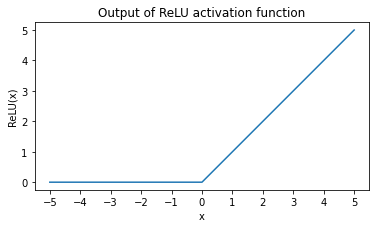

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import activation

# define x
x = np.arange(-5, 6, 1)

# calculate relu output
relu = activation.ReLU()
y = relu.forward(x)

# plot result
fig = plt.figure()
ax = fig.add_subplot(111,aspect="equal")
plt.plot(x, y)
plt.title("Output of ReLU activation function")
plt.xlabel("x")
plt.xticks(np.arange(-5,6,1))
plt.ylabel("ReLU(x)")
plt.yticks(np.arange(0,6,1))
plt.show()

It is clearly visible that the derivative of the ReLU actiavtion function is 0 for negative x values and 1 for positive x values. For x=0 the derivative is mathematically undefined, but set to 1 in this implementation. Although the derivative is so simple let's do gradient checking for the sake of good practice.

In [10]:
import grad_check
relu = activation.ReLU()
grad_check.check_elementwise_activation(relu)

epsilon:  1e-05
biggest difference:  3.1741365091875196e-10


# Softmax activation function

defined as $ softmax(s_i) = \Large \frac{e^{s_i}}{\sum\limits_{k}^{n} e^{s_{k}}}$ where $s_i$ is the score (output of neuron before softmax) of the ith class and $n$ is the number of classes.

Let's say our neural network has 3 output classes with scores $x,y,z$ then the corresponding softmax outputs are $\Large \frac{e^x}{e^x+e^y+e^z}$ $\Large \frac{e^y}{e^x+e^y+e^z}$ and $\Large \frac{e^z}{e^x+e^y+e^z}$

How does the derivative look like for these functions?

For this partial derivative $\Large \frac{\partial \frac{e^x}{{e^x+e^y+e^z}}}{\partial x}$ we need the quotient rule: $h(x) = \frac{f(x)}{g(x)}$ => $h'(x) = \Large \frac{g(x)f'(x) - f(x)g'(x)}{g(x)^2}$

$\Large \frac{\partial e^x}{\partial x}$ $= e^x$

$g(x) => (e^x+e^y+e^z)$, $\Large \frac{\partial e^x+e^y+e^z}{\partial x}$ $= e^x $


Therefore $\Large \frac{\partial softmax(x)}{\partial x} = \frac{(e^x+e^y+e^z) \cdot e^x - e^x \cdot e^x}{(e^x+e^y+e^z)^2} = \frac{e^x}{(e^x+e^y+e^z)} \cdot \frac{(e^x+e^y+e^z)-e^x}{(e^x+e^y+e^z)} = h(x) \cdot (1 - h(x))$

for $f(x)=e^y$ and $f(x)=e^z$ respectively in $h'(x) = \Large \frac{g(x)f'(x) - f(x)g'(x)}{g(x)^2}$ the partial derivative $\frac{\partial f(x)}{\partial x} = 0$

therefore